# Мини проект

In [120]:
# для начала пойму что это за датасет и предобработаю его при необходимости.

import pandas as pd

try:    
    df = pd.read_csv('../datasets/logs_exp.csv', sep='\t')
except:
    print('Dataset not found.')
    
df.info() 

# вижу что датасет полностью наполнен

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [121]:
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


- EventName — название события;
- DeviceIDHash — уникальный идентификатор пользователя;
- EventTimestamp — время события;
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

- Каждая строка в датасете - это посщение юзером, имеющим свой уникальный DeviceIDHash, оной из станиц веб-сайта.
- Эта таблица позволяет нам отследить путь юзеров.
  
- Исходя из описания к заданию, все ясно с назначением колонн
- Единственное для удобства, я бы преобразовал колонну EventTimestamp из unix формата в обычный.

In [122]:
df['TimestampForHuman'] = pd.to_datetime(df['EventTimestamp'], unit='s') # конвертируем колонну EventTimestamp и добавляем ее как новый столбец
df.drop_duplicates() # удалим дублирующиеся записи если они есть
df

,EventName,DeviceIDHash,EventTimestamp,ExpId,TimestampForHuman
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58


In [123]:
# Колонна EventName описывает что именно произошло в то или иное время. Я бы хотел понять какие уникальные записи имеются в этой колонне.
event_names = df['EventName'].unique()
event_names

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Я понял значения колонны EventName следующим образом:
- MainScreenAppear - юзер зашел на главную страницу.
- PaymentScreenSuccessful - юзер был перенаправлен на страницу сообщающей об успешном проведении оплаты.
- CartScreenAppear - юзер перешел в корзину с товарами.
- OffersScreenAppear - юзер перешел на страницу с предложениями.
- Tutorial - страница с описанием веб-сайта (как им пользоваться).

In [124]:
# Посчитав уникальные DeviceIDHash мы можем понять сколько человек заходило на веб-сайт за определенный период времени.
users_count = df['DeviceIDHash'].nunique()
users_count

7551

In [125]:
# было бы также полезно понять за какой период времени у нас данные
time_range = []

val = df['TimestampForHuman'].min()
time_range.append(val)

val = df['TimestampForHuman'].max()
time_range.append(val)

time_range
# получается что у нас данные с 25 Июля 2019 по 7 Августа 2019

[Timestamp('2019-07-25 04:43:36'), Timestamp('2019-08-07 21:15:17')]

([<matplotlib.patches.Wedge at 0x1f5162f87d0>,
 [Text(0.937837964489716, 0.5748564623989074, 'CartScreenAppear'),
  Text(-0.9612047954577926, 0.5348694618212403, 'MainScreenAppear'),
  Text(0.06377775262884826, -1.0981495336563294, 'OffersScreenAppear'),
  Text(0.9814014128092663, -0.49684128948385164, 'PaymentScreenSuccessful'),
  Text(1.0998992015312186, -0.014891154118739727, 'Tutorial')],
 [Text(0.5115479806307541, 0.313558070399404, '17.5%'),
  Text(-0.5242935247951596, 0.29174697917522197, '48.8%'),
  Text(0.03478786507028086, -0.5989906547216342, '19.2%'),
  Text(0.535309861532327, -0.2710043397184645, '14.1%'),
  Text(0.5999450190170282, -0.008122447701130759, '0.4%')])

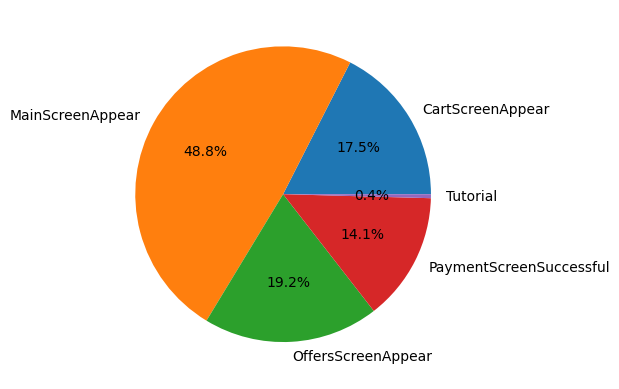

In [126]:
# Было бы интересно построить пай-чарт, чтобы понять какие из страниц веб-сайта являются самыми популярными среди пользователей.
import matplotlib.pyplot as plt

pie = df.groupby('EventName').agg({'DeviceIDHash':'count'}).reset_index()

sizes = pie['DeviceIDHash']
labels = pie['EventName']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

- Как мы видим, большинство пользователей (48,8%) просто заходят на главную страницу.
- 19,2% заходят на страницу с предожениями
- 17,5% переходят в корзину
- ### 14,1% совершают покупки
- и 0,4% переходят на страницу с описанием веб-сайта.

In [127]:
pie

,EventName,DeviceIDHash
0,CartScreenAppear,42731
1,MainScreenAppear,119205
2,OffersScreenAppear,46825
3,PaymentScreenSuccessful,34313
4,Tutorial,1052


# 

# Посчитайте количество девайсов, сгруппированных по группам (ExpId)

In [128]:
# считаем количество уникальных значений DeviceIDHash, тем самым получаем количество девайсов.
devices = df.groupby('ExpId').agg({'DeviceIDHash': 'nunique'}).reset_index()
devices

,ExpId,DeviceIDHash
0,246,2489
1,247,2520
2,248,2542


In [129]:
# чтобы проверить себя, сложу все получившиеся значения. Должно получиться 7551 (рассчитал ранее)
devices['DeviceIDHash'].sum()

7551

# Посчитайте количество посещений, сгруппированных по группам (ExpId)

In [130]:
# каждая строка это посещение той или иной cтраницы
# поэтому в данном случае нам нужно считать каждую строку, независимо от колонны
sessions = df.groupby('ExpId').agg({'DeviceIDHash': 'count'}).reset_index()
sessions.rename(columns={'DeviceIDHash': 'Visited'}, inplace=True) # переименуем стоблец с цифрами для удобства
sessions

,ExpId,Visited
0,246,80304
1,247,78075
2,248,85747


# Посчитайте количество посещений в каждую страницу

In [131]:
# то же самое я делал когда рисовал пай-чарт
page_views = df.groupby('EventName').agg({'DeviceIDHash': 'count'}).reset_index().sort_values(by='DeviceIDHash', ascending=False)
page_views

,EventName,DeviceIDHash
1,MainScreenAppear,119205
2,OffersScreenAppear,46825
0,CartScreenAppear,42731
3,PaymentScreenSuccessful,34313
4,Tutorial,1052


# Постройте воронку из библиотеки Plotly (Funnel), которая будет описывать количество посещений в каждую таблицу

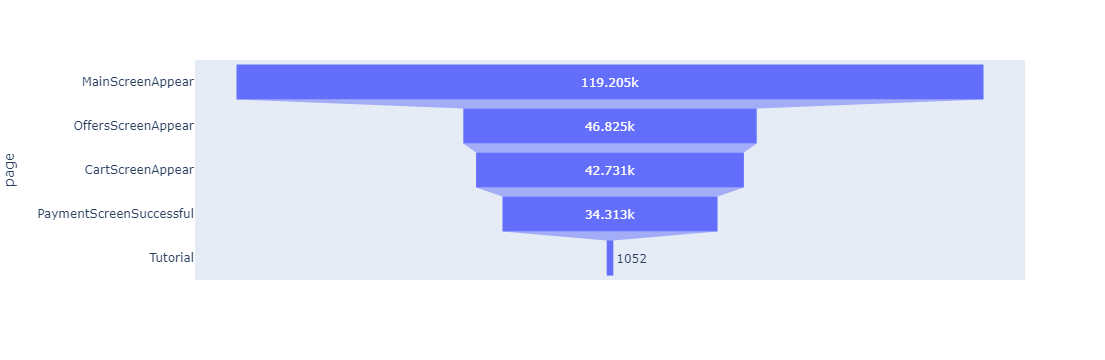

In [132]:
# использую таблицу созданную в предыдущем задании, чтобы на ее основе построить воронку


import plotly.express as px
# page_views = df.groupby('EventName').agg({'DeviceIDHash': 'count'}).reset_index().sort_values(by='DeviceIDHash', ascending=False)
data = dict(
    page=page_views['EventName'],
    amount=page_views['DeviceIDHash'])
fig = px.funnel(data, x='amount', y='page')
fig.show()

# * Постройте воронку из библиотеки PLotly (Funnel), которая будет описывать количество посещений, а также показывать Конверсию в переходы.

In [133]:
# Насколько я понял, конверсия - это процент пользователей которые перешли на следующую страницу, то есть совершили следующий шаг в последовательности.
# При окончании последовательности, в нашем случае это проходжение страницы PaymentScreenSuccessful, мы знаем точно, что юзер совершил покупку.

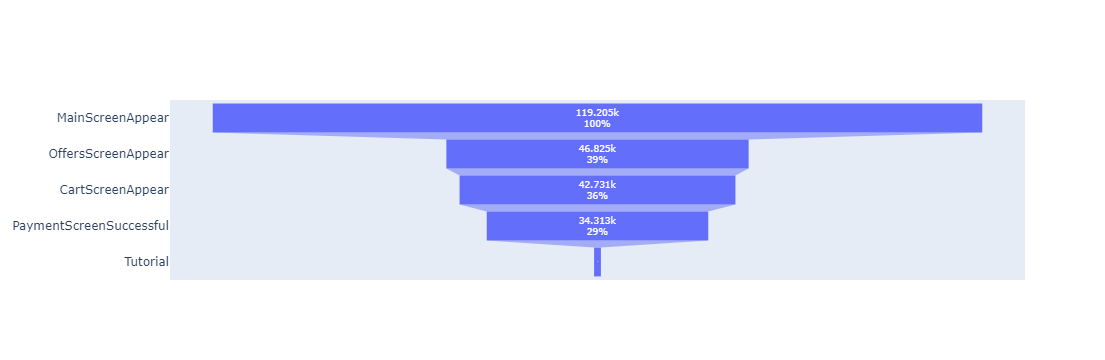

In [134]:
from plotly import graph_objects as go

page_views2 = df.groupby('EventName').agg({'DeviceIDHash': 'count'}).reset_index().sort_values(by='DeviceIDHash', ascending=False)

fig = go.Figure(go.Funnel(
    y = page_views2['EventName'],
    x = page_views2['DeviceIDHash'],
    textposition = "inside",
    textinfo = "value+percent initial")
    )

fig.show()
# эта воронка, как и предыдущая, показывает нам что наибольшее число пользователей "теряется" сразу после посещения главной страницы.
# что интересно, очень мало юзеров заходило на страницу Tutorial

In [135]:
# прежде чем давать ответы, интересно было бы, более детально рассмотреть причину потери 61% процента посещений, после посещения главной страницы
# первым делом я хотел бы найти ID пользователей которые совершили целевое действие, то есть совершили покупку на веб-сайте

df_success = df[df['EventName'] == 'PaymentScreenSuccessful'].sort_values(by=['DeviceIDHash'])
users_paid = df_success['DeviceIDHash'].unique().tolist() # получаем лист который содержит все ID покупателей которые совершили покупку
users_paid

[6909561520679493,
 6922444491712477,
 7702139951469979,
 9841258664663090,
 15708180189885246,
 18658818197810381,
 20795828045873027,
 28534696657485531,
 29094035245869447,
 31467376676344061,
 33381960957324102,
 33589551945846495,
 34565258828294726,
 38461249625575645,
 40352430792344971,
 46236857309457992,
 50002244844355989,
 50955739939045762,
 54903596035630984,
 61976594028147959,
 62853461369047667,
 67153306548697605,
 74158328448226259,
 74248254043264762,
 76430713684339660,
 77364241990273403,
 78033526859485994,
 80189413012306034,
 80337800659956110,
 84107839139059565,
 89078601045475920,
 89892936241398759,
 91292479590032512,
 94452812501143599,
 97337799800097594,
 97680762694751109,
 98792428456080413,
 98833552209755665,
 104193994866123657,
 104485797972356373,
 105264533697038706,
 105663051436100766,
 106256020648490230,
 111394506613435756,
 115925259125407295,
 116454972706892511,
 116683309485180923,
 120492535353891409,
 131998561967975839,
 133486548927

In [136]:
# однако надо не забывать что у нас также есть группы - контрольная(х2) и экпериментальная
contr_group246 = df_success[df_success['ExpId'] == 246]
contr_group247 = df_success[df_success['ExpId'] == 247]
exp_group248 = df_success[df_success['ExpId'] == 248]

all_groups = [contr_group246, contr_group247, exp_group248]
comparison = []

# посмотрим в какой из групп больше людей купивших товар
for group in all_groups:
    comparison.append(group['DeviceIDHash'].nunique())

comparison

[1202, 1160, 1185]

In [137]:
test = df[df['DeviceIDHash'] == 6909561520679493].sort_values(by=['EventTimestamp'])

list(test['EventName']) # таким образом я получаю путь одного юзера

# проверив самого первого юзера в списке я был удивлен, так как не увидел той картины которой ожидал
# в моем понимании должно было быть так:
# MainScreenAppear => OffersScreenAppear => CartScreenAppear => PaymentScreenSuccessful

# Вероятно, веб-сайт позволяет купить вещи/товар сразу на главной странице не кладя их перед этим в корзину.

# Так же я предполагал что вещь лежала в корзине еще до этого (у нас выборка всего за два месяца), но для этого,
# юзер должен был бы, скорее всего, перейти в корзину вторым шагом (MainScreenAppear => CartScreenAppear => PaymentScreenSuccessful)

['MainScreenAppear',
 'PaymentScreenSuccessful',
 'CartScreenAppear',
 'MainScreenAppear',
 'OffersScreenAppear']

In [138]:
# я хочу вычислить самый популярный путь 

In [139]:
years = df.groupby('TimestampForHuman').agg({'EventName': 'count'}).reset_index()
years['TimestampForHuman'] = years['TimestampForHuman'].dt.month 
his = years.groupby('TimestampForHuman').agg({'EventName': 'sum'}).reset_index()

# fig = plt.figure(figsize = (12, 6))
# h = df['TimestampForHuman'].hist(bins = 50)
#fig.autofmt_xdate()

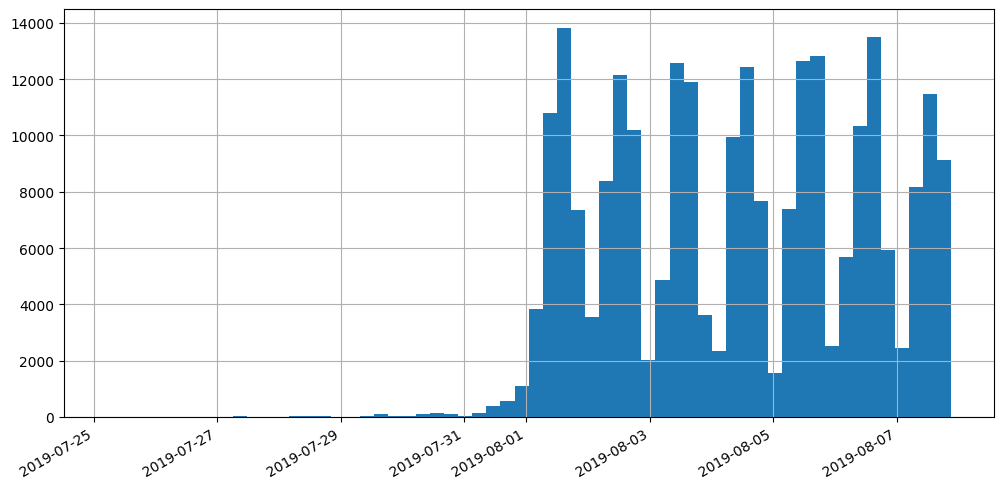

In [140]:
fig = plt.figure(figsize = (12, 6))
h = df['TimestampForHuman'].hist(bins = 60)
fig.autofmt_xdate()

# Выводы

In [141]:
from collections import Counter

# Ваш список, содержащий множество листов
paths_list = []

for i in users_paid:
    test = df[df['DeviceIDHash'] == int(i)].sort_values(by=['EventTimestamp'])
    paths_list.append(list(test['EventName']))

# Создаем пустой счетчик
common_paths_counter = Counter()

# Обходим все листы и увеличиваем счетчик для каждого пути
for path in paths_list:
    common_paths_counter[tuple(path)] += 1

# Выбираем самый популярный путь
most_common_path, count = common_paths_counter.most_common(1)[0]

# Визуализация самого популярного пути
print(f"The most common path is: {most_common_path} with count: {count}")

The most common path is: ('MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear', 'MainScreenAppear', 'OffersScreenAppear') with count: 14


In [142]:
paths_list

[['MainScreenAppear',
  'PaymentScreenSuccessful',
  'CartScreenAppear',
  'MainScreenAppear',
  'OffersScreenAppear'],
 ['MainScreenAppear',
  'PaymentScreenSuccessful',
  'CartScreenAppear',
  'MainScreenAppear',
  'OffersScreenAppear',
  'MainScreenAppear',
  'PaymentScreenSuccessful',
  'MainScreenAppear',
  'CartScreenAppear',
  'OffersScreenAppear',
  'MainScreenAppear',
  'OffersScreenAppear',
  'OffersScreenAppear',
  'MainScreenAppear',
  'MainScreenAppear',
  'MainScreenAppear',
  'MainScreenAppear',
  'MainScreenAppear',
  'OffersScreenAppear',
  'MainScreenAppear',
  'MainScreenAppear',
  'MainScreenAppear',
  'CartScreenAppear',
  'PaymentScreenSuccessful',
  'OffersScreenAppear',
  'PaymentScreenSuccessful',
  'CartScreenAppear',
  'PaymentScreenSuccessful',
  'CartScreenAppear',
  'CartScreenAppear',
  'PaymentScreenSuccessful',
  'CartScreenAppear',
  'PaymentScreenSuccessful',
  'MainScreenAppear',
  'MainScreenAppear',
  'PaymentScreenSuccessful',
  'CartScreenAppear'